In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data= pd.read_csv('cleaned_Data.csv')

In [3]:
data.columns

Index(['date', 'temp', 'dew_pt', 'hum', 'wind_spd', 'vis', 'pressure', 'rain'], dtype='object')

In [4]:
data.head()

,date,temp,dew_pt,hum,wind_spd,vis,pressure,rain
0,2018-01-01 02:30:00,69,64,80,2.3,1,29.87,0
1,2018-01-01 05:30:00,68,65,87,4.6,1,29.84,0
2,2018-01-01 08:30:00,71,64,71,6.9,1,29.92,0
3,2018-01-01 11:30:00,79,69,64,4.6,2,29.89,0
4,2018-01-01 14:30:00,79,64,51,6.9,2,29.82,0


In [5]:
data=data.set_index('date')
data.index=pd.DatetimeIndex(data.index)

In [6]:
data['day_name'],data['month_name'],data['year']=data.index.day_name(),data.index.month_name(),data.index.year

In [7]:
data.head()

,temp,dew_pt,hum,wind_spd,vis,pressure,rain,day_name,month_name,year
date,,,,,,,,,,
2018-01-01 02:30:00,69,64,80,2.3,1,29.87,0,Monday,January,2018
2018-01-01 05:30:00,68,65,87,4.6,1,29.84,0,Monday,January,2018
2018-01-01 08:30:00,71,64,71,6.9,1,29.92,0,Monday,January,2018
2018-01-01 11:30:00,79,69,64,4.6,2,29.89,0,Monday,January,2018
2018-01-01 14:30:00,79,64,51,6.9,2,29.82,0,Monday,January,2018


In [8]:
data['dates']=data.index.date

In [9]:
data[data['rain']==0].pivot_table(index=data['dates'])['temp']

dates
2018-01-01    73.375000
2018-01-02    71.625000
2018-01-03    69.750000
2018-01-04    73.400000
2018-01-05    69.714286
2018-01-06    69.000000
2018-01-07    68.750000
2018-01-08    69.000000
2018-01-09    67.125000
2018-01-10    68.500000
2018-01-11    70.000000
2018-01-12    72.285714
2018-01-13    72.750000
2018-01-14    72.571429
2018-01-15    71.250000
2018-01-16    71.125000
2018-01-17    71.500000
2018-01-18    69.875000
2018-01-19    69.750000
2018-01-20    69.875000
2018-01-21    70.500000
2018-01-22    71.250000
2018-01-23    71.625000
2018-01-24    71.875000
2018-01-25    72.750000
2018-01-26    72.375000
2018-01-27    73.000000
2018-01-28    73.714286
2018-01-29    71.375000
2018-01-30    72.375000
                ...    
2018-10-03    87.125000
2018-10-04    86.000000
2018-10-05    85.375000
2018-10-06    85.375000
2018-10-07    87.857143
2018-10-08    86.625000
2018-10-09    83.875000
2018-10-10    79.000000
2018-10-11    82.666667
2018-10-12    82.500000
2018-10-13

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


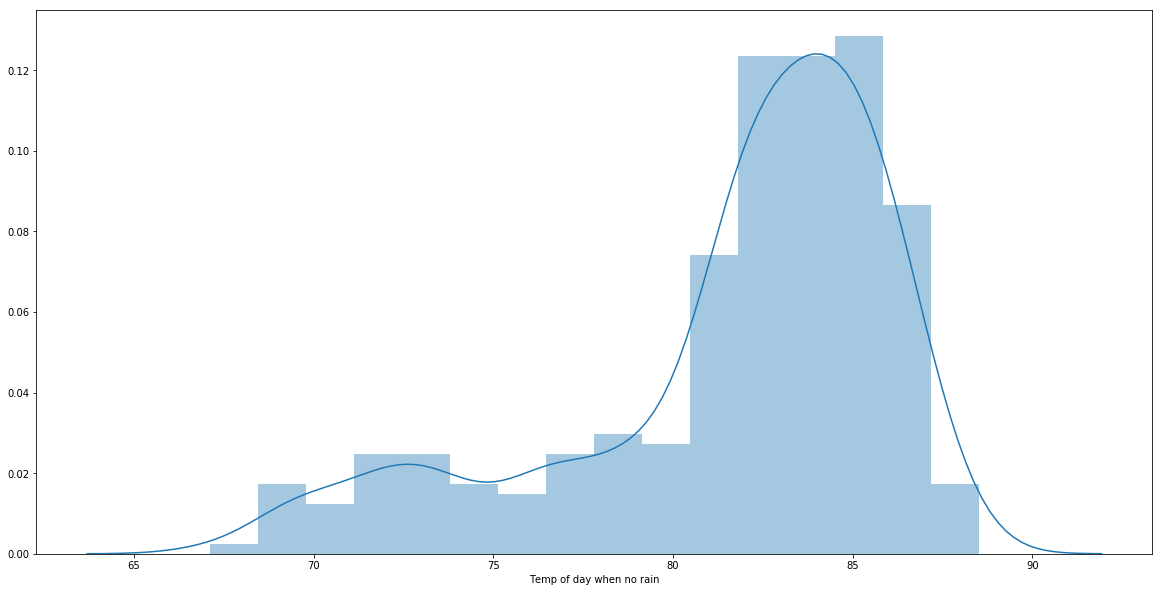

In [10]:
plt.figure(figsize=[20,10])
sns.distplot(data[data['rain']==0].pivot_table(index=['dates'])['temp'],axlabel='Temp of day when no rain')

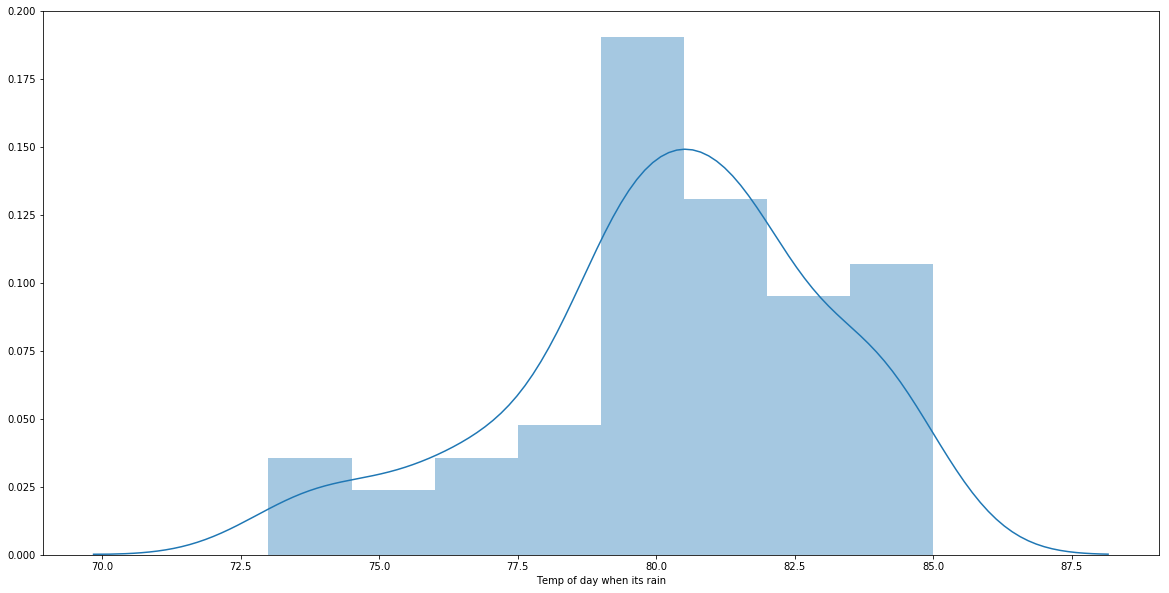

In [11]:
plt.figure(figsize=[20,10])
sns.distplot(data[data['rain']==1].pivot_table(index=['dates'])['temp'],axlabel='Temp of day when its rain')

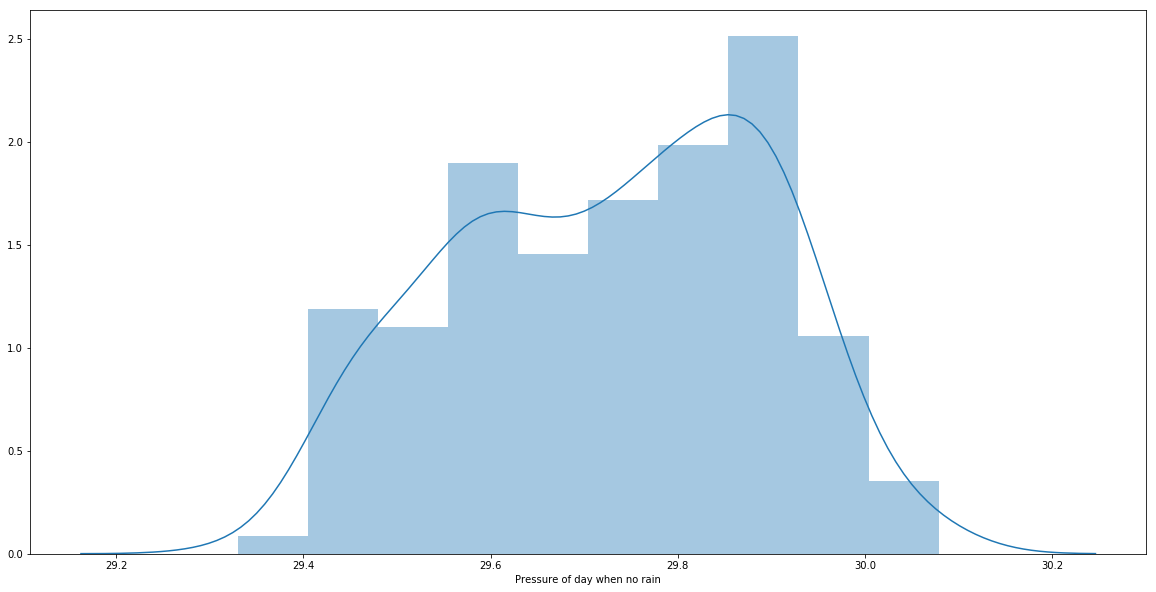

In [12]:
plt.figure(figsize=[20,10])
sns.distplot(data[data['rain']==0].pivot_table(index=['dates'])['pressure'],axlabel='Pressure of day when no rain')

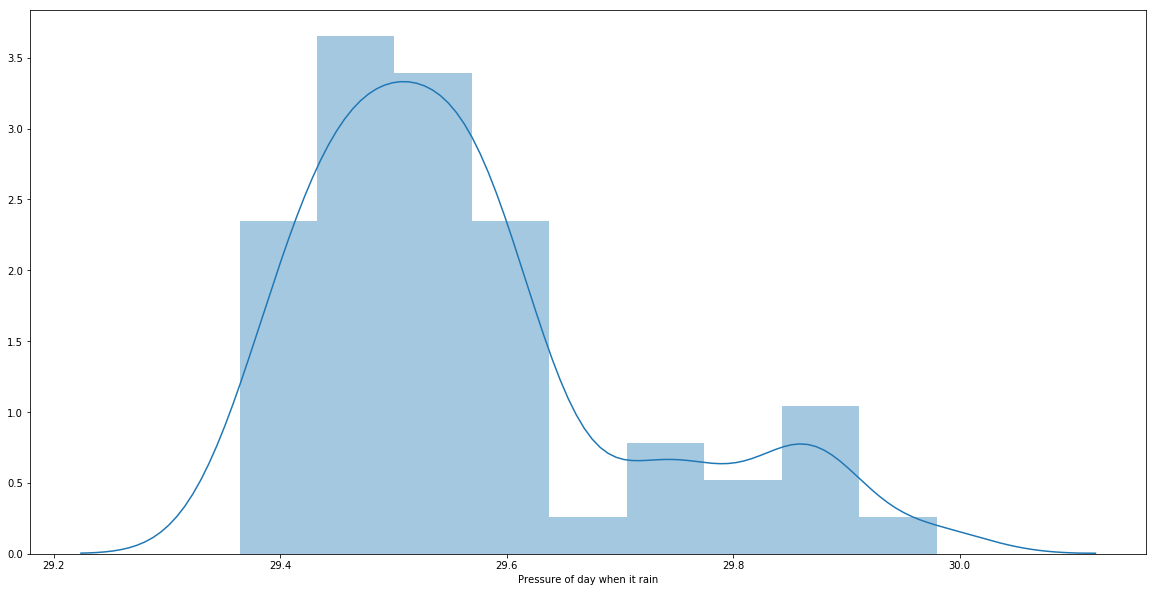

In [13]:
plt.figure(figsize=[20,10])
sns.distplot(data[data['rain']==1].pivot_table(index=['dates'])['pressure'],axlabel='Pressure of day when it rain')

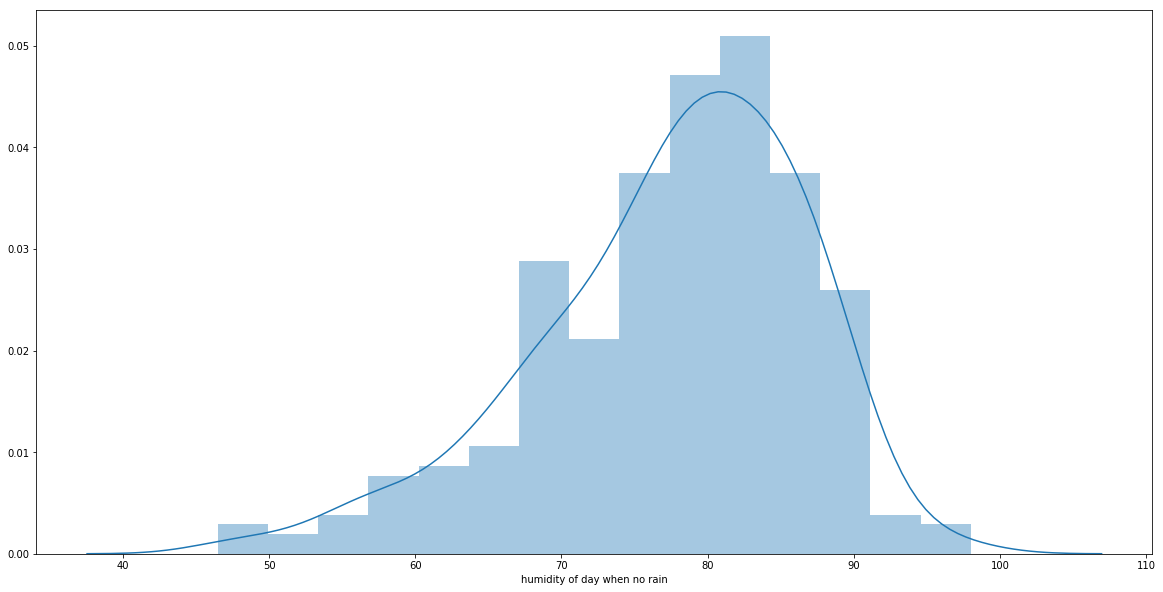

In [14]:
plt.figure(figsize=[20,10])
sns.distplot(data[data['rain']==0].pivot_table(index=['dates'])['hum'],axlabel='humidity of day when no rain')

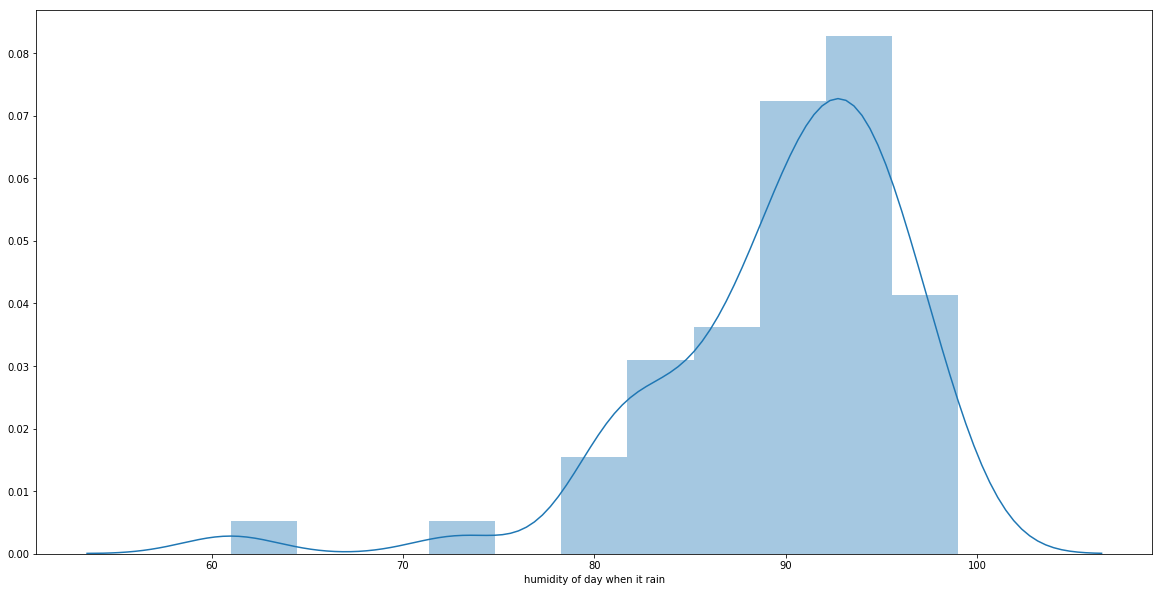

In [15]:
plt.figure(figsize=[20,10])
sns.distplot(data[data['rain']==1].pivot_table(index=['dates'])['hum'],axlabel='humidity of day when it rain')

In [16]:
data.columns

Index(['temp', 'dew_pt', 'hum', 'wind_spd', 'vis', 'pressure', 'rain',
       'day_name', 'month_name', 'year', 'dates'],
      dtype='object')

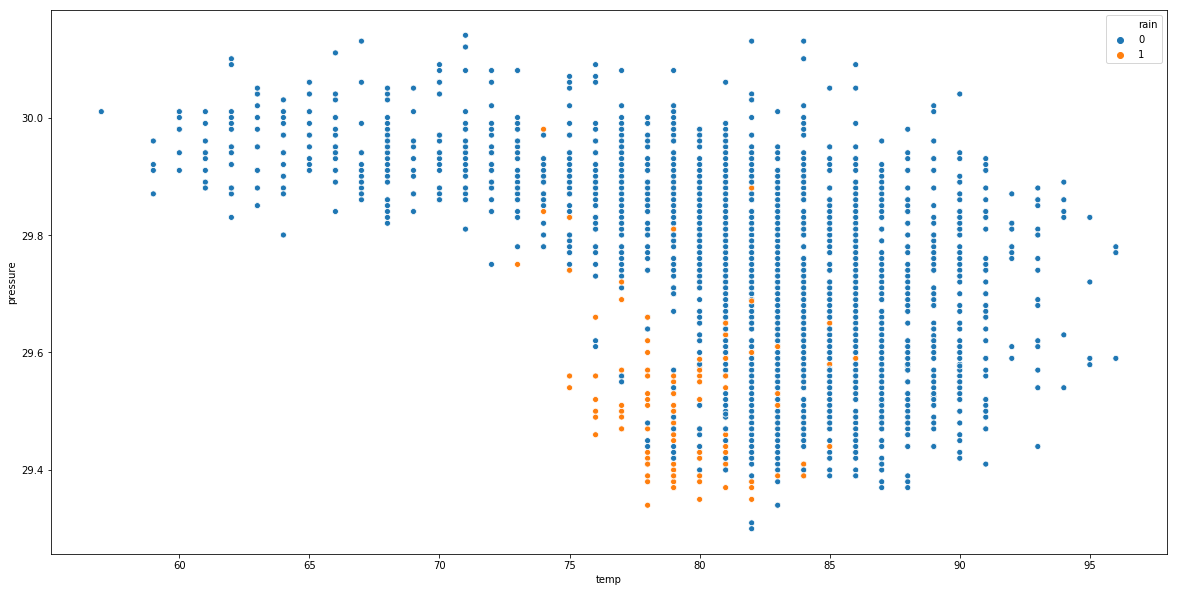

In [20]:
plt.figure(figsize=[20,10])
sns.scatterplot(x='temp', y='pressure',data = data, hue='rain')

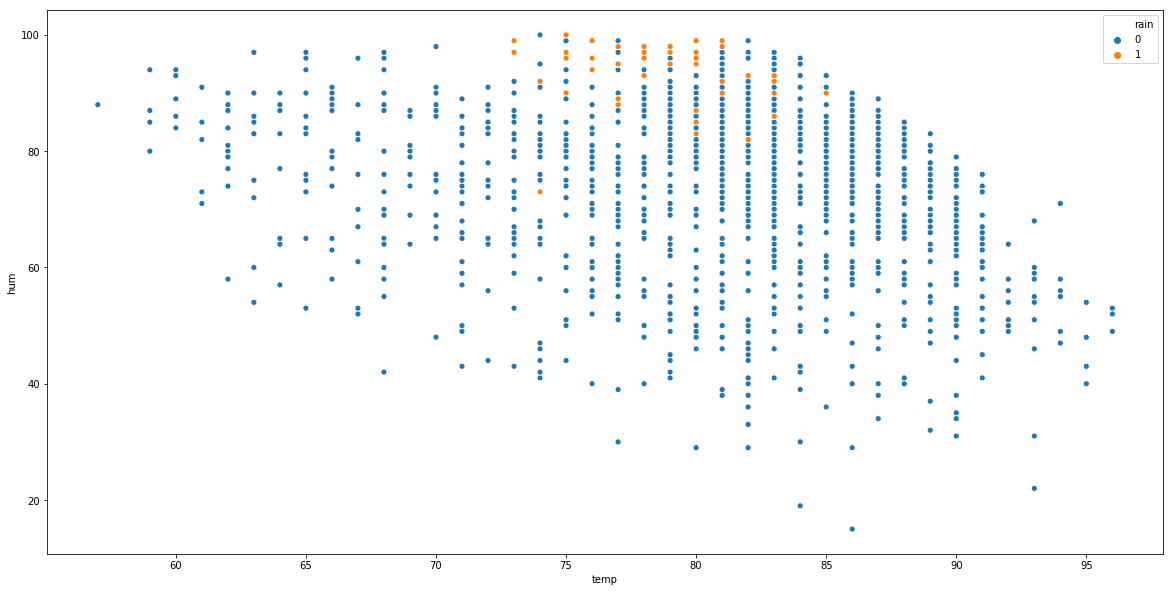

In [21]:
plt.figure(figsize=[20,10])
sns.scatterplot(x='temp', y='hum',data = data, hue='rain')

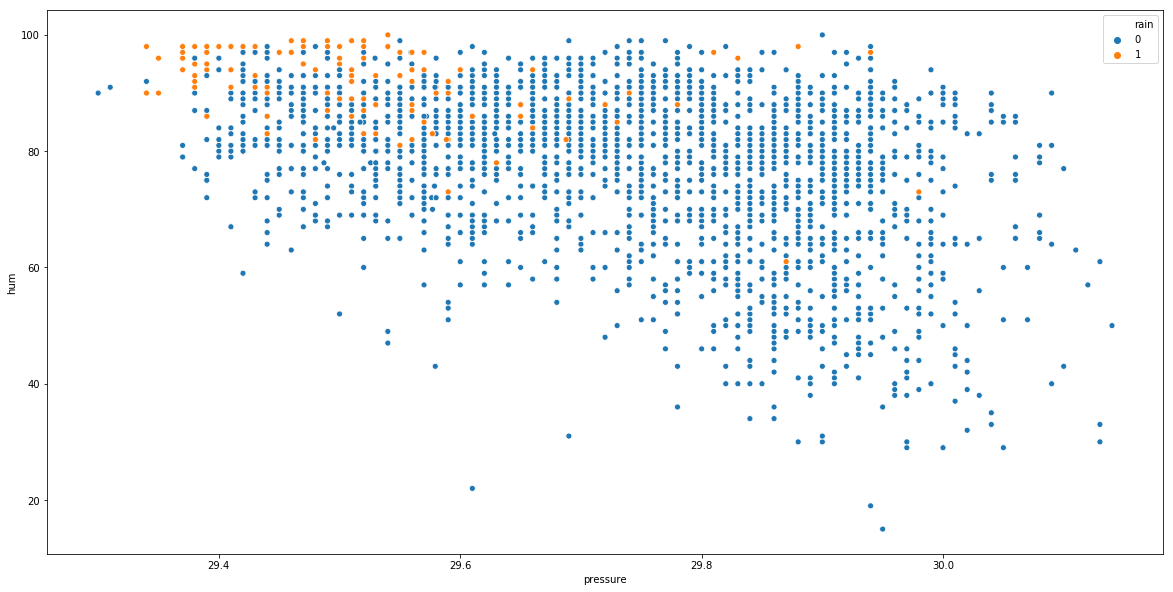

In [22]:
plt.figure(figsize=[20,10])
sns.scatterplot(x='pressure', y='hum',data = data, hue='rain')

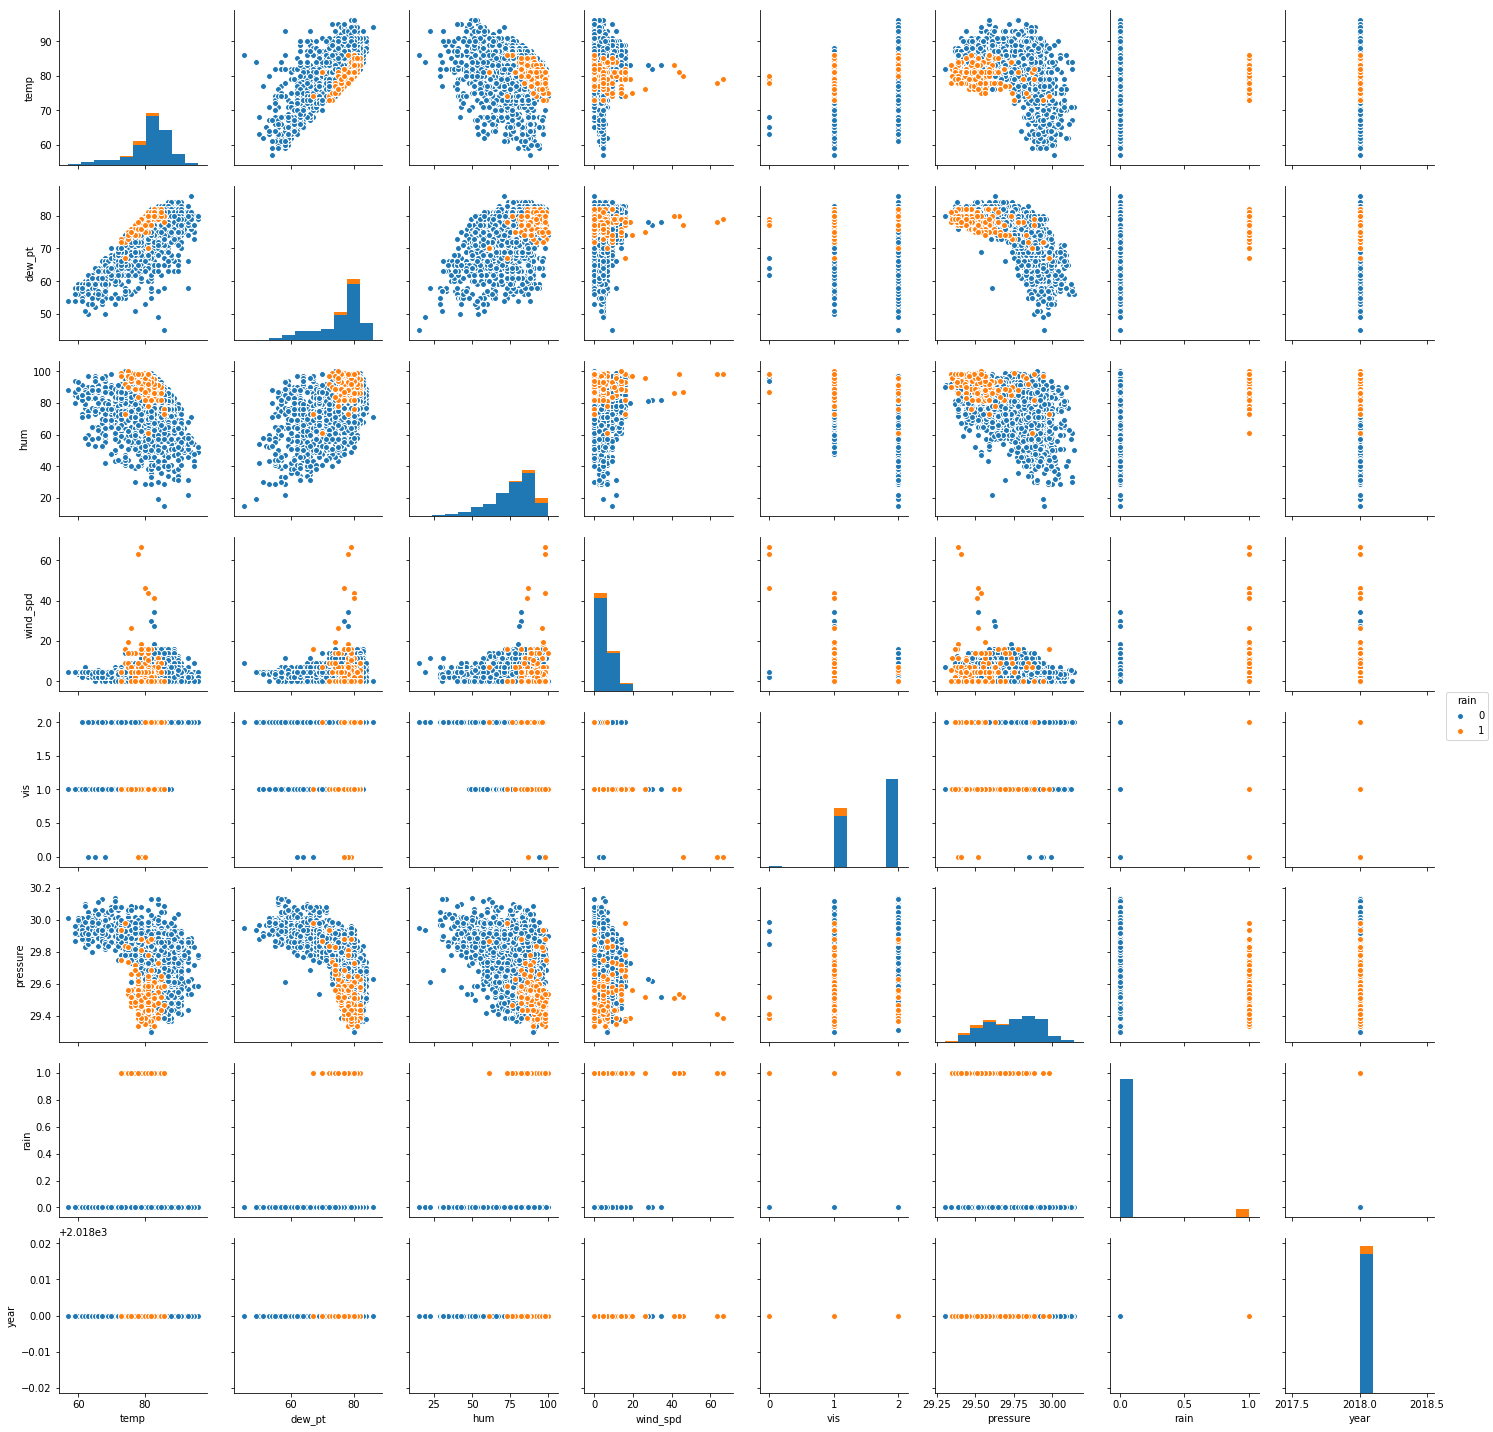

In [28]:
sns.pairplot(data=data,hue='rain')

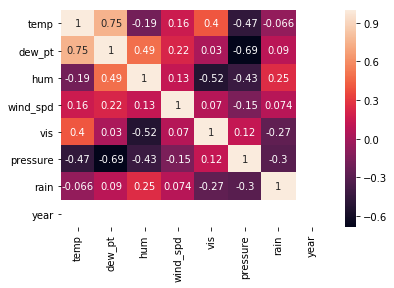

In [29]:
sns.heatmap(data.corr(),annot=True)

In [31]:
data.pivot_table(index=['year','month_name','day_name'])['temp']

year  month_name  day_name 
2018  April       Friday       83.033333
                  Monday       83.081081
                  Saturday     82.645161
                  Sunday       82.350000
                  Thursday     83.000000
                  Tuesday      82.548387
                  Wednesday    82.290323
      August      Friday       84.050000
                  Monday       82.800000
                  Saturday     85.187500
                  Sunday       83.032258
                  Thursday     84.125000
                  Tuesday      82.687500
                  Wednesday    84.000000
      February    Friday       76.000000
                  Monday       76.500000
                  Saturday     75.806452
                  Sunday       76.000000
                  Thursday     76.281250
                  Tuesday      75.843750
                  Wednesday    76.937500
      January     Friday       71.033333
                  Monday       71.250000
                  Saturday   

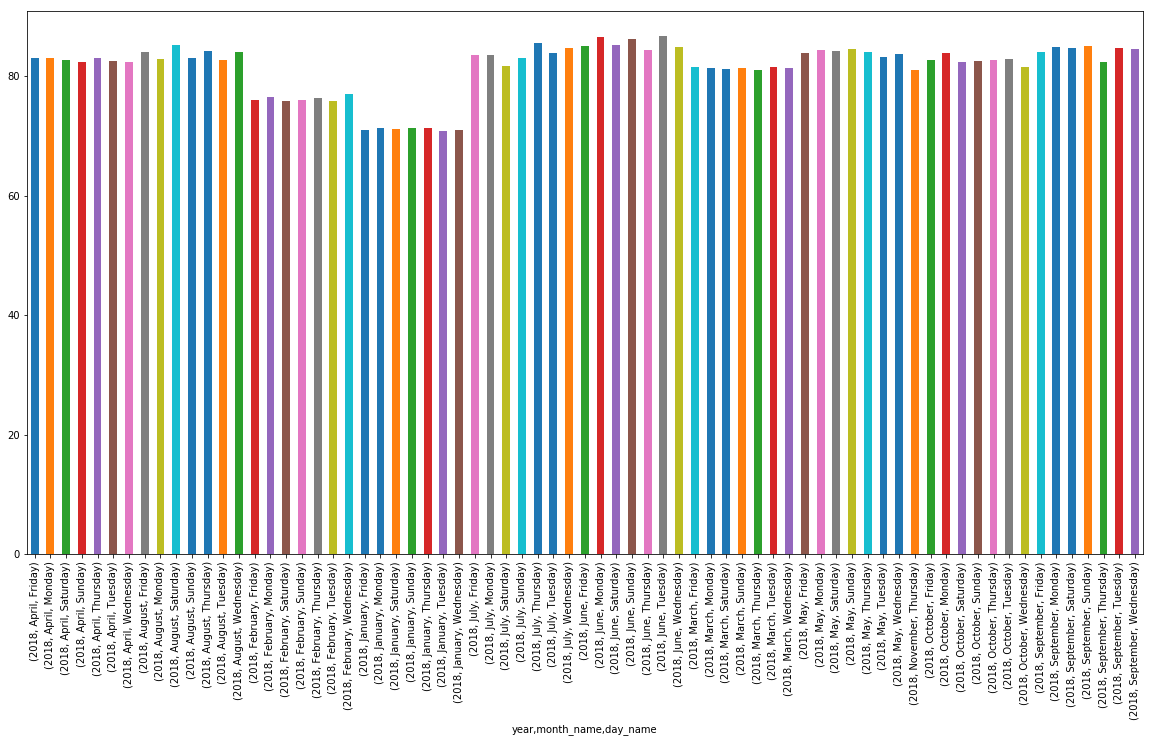

In [32]:
plt.figure(figsize=[20,10])
data.pivot_table(index=['year','month_name','day_name'])['temp'].plot(kind='bar')

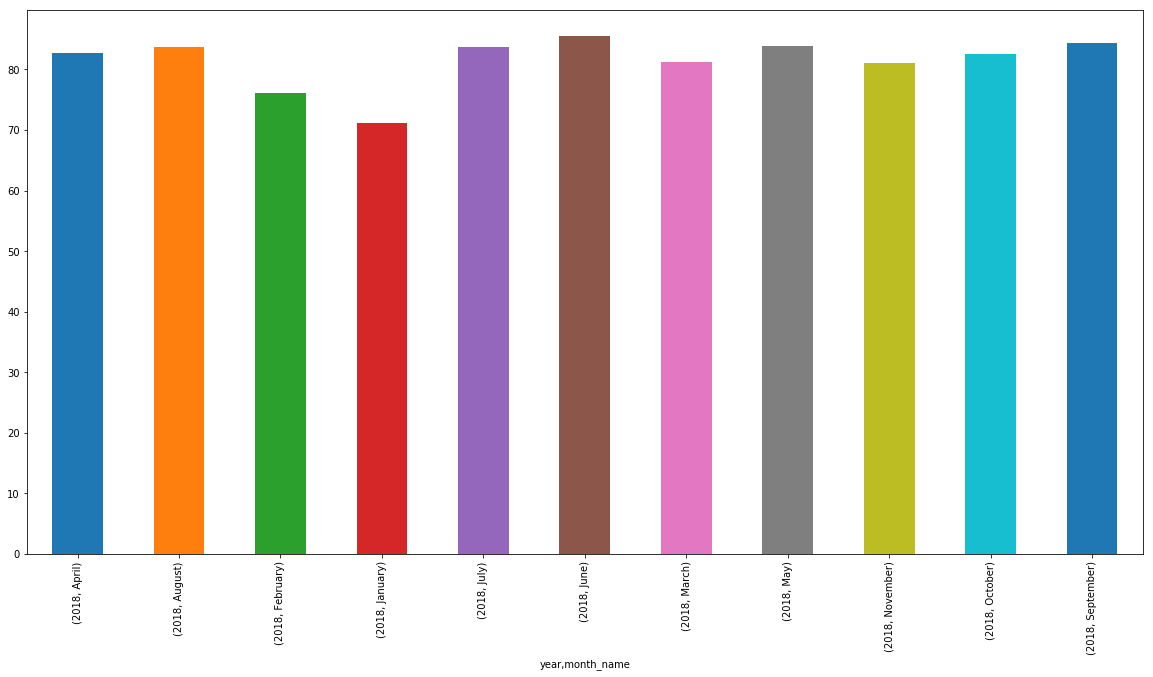

In [33]:
plt.figure(figsize=[20,10])
data.pivot_table(index=['year','month_name'])['temp'].plot(kind='bar')

In [35]:
data[(data['year']==2017)&(data['month_name']=='April')]['rain'].value_counts()

Series([], Name: rain, dtype: int64)

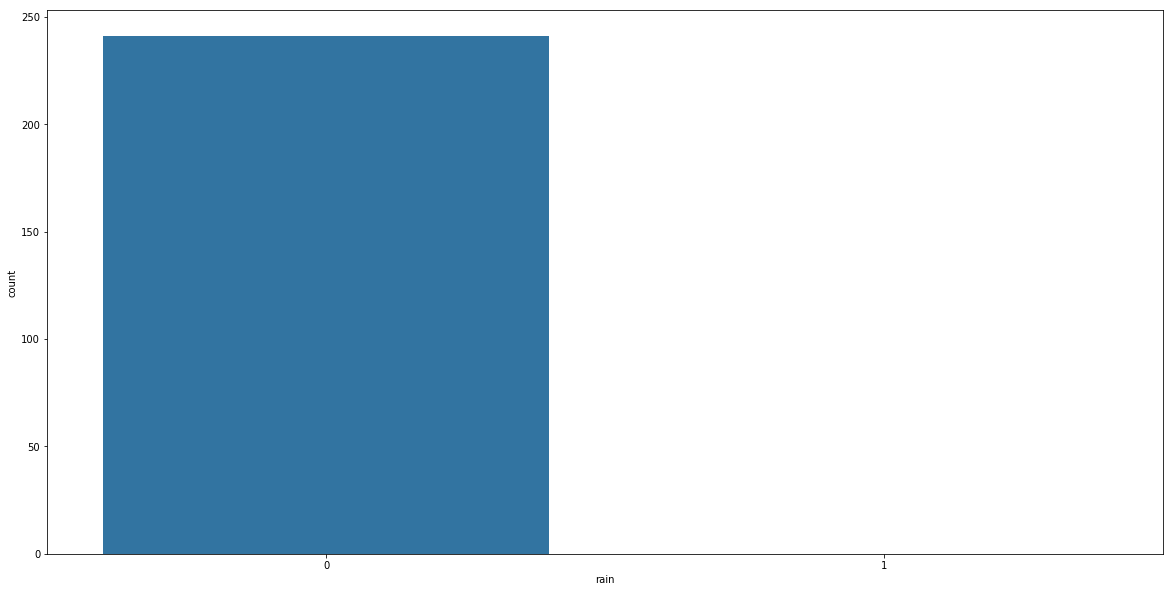

In [37]:
plt.figure(figsize=[20,10])
sns.countplot(x='rain',order=[0,1],data=data[(data['year']==2018)&(data['month_name']=='January')])

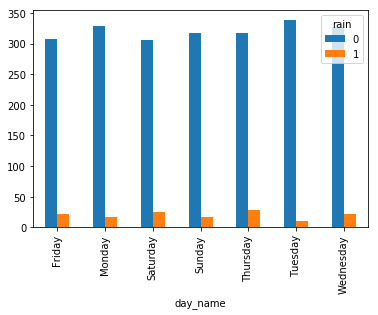

In [38]:
pd.crosstab(data.day_name,data.rain).plot(kind='bar')

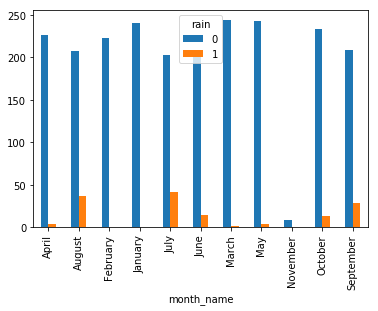

In [39]:
pd.crosstab(data.month_name,data.rain).plot(kind='bar')